# COVID
### FONTE

Presidenza del Consiglio dei Ministri - Dipartimento della Protezione Civile

https://github.com/pcm-dpc

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
#%matplotlib widget


link_dpcprovince = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
dati=pd.read_csv(link_dpcprovince)

dati['data']=pd.to_datetime(dati['data'])
dati['data']=dati['data'].dt.normalize()
dati['index1'] = dati.index
dati = dati[['index1','data','stato','denominazione_regione','codice_provincia','denominazione_provincia','sigla_provincia','totale_casi']]

#dati

### DATI LOMBARDIA

In [8]:
#DATI LOMBARDIA
lombardia = dati.loc[dati['denominazione_regione'] == 'Lombardia']
#CLEAN
lombardia.loc[lombardia['denominazione_provincia']== 'In fase di definizione/aggiornamento','denominazione_provincia'] = np.nan
lombardia = lombardia.dropna(subset = ['denominazione_provincia'])
lombardia = lombardia[['data','denominazione_provincia','totale_casi']]
lombardia = lombardia.replace('Monza e della Brianza','Monza Brianza')
lombardia = lombardia.replace('Fuori Regione / Provincia Autonoma','Provincia Autonoma')
l2=lombardia.set_index(['data','denominazione_provincia']).totale_casi.unstack()
l2=l2.diff(axis=0)
l2=l2.fillna(0)
l2=l2.loc[l2.index[1::]] #Toglie prima riga 
l2.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


denominazione_provincia,Bergamo,Brescia,Como,Cremona,Lecco,Lodi,Mantova,Milano,Monza Brianza,Pavia,Provincia Autonoma,Sondrio,Varese
data,,,,,,,,,,,,,
2020-02-25,18.0,0.0,0.0,53.0,0.0,125.0,0.0,8.0,3.0,27.0,0.0,1.0,0.0
2020-02-26,2.0,2.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
2020-02-27,52.0,8.0,0.0,34.0,0.0,31.0,0.0,7.0,1.0,9.0,0.0,0.0,0.0
2020-02-28,31.0,3.0,0.0,32.0,0.0,23.0,0.0,14.0,1.0,13.0,0.0,0.0,3.0
2020-02-29,7.0,1.0,1.0,13.0,0.0,55.0,1.0,1.0,0.0,6.0,0.0,0.0,1.0


In [80]:
#IMPOSTA DATA INIZIO DATAFRAME
data_inizio= l2.index[0]
prov=list(l2.columns)

#VBOX ATTEMPT
startcalendar = widgets.DatePicker(description='Select Date')
multi=widgets.SelectMultiple(options=prov,description='Province:',disabled=False,rows=13)
weekly=widgets.Checkbox(value=False,description='Raggruppa per settimana',disabled=False)
box=widgets.VBox((startcalendar,weekly,multi),position='left')

In [81]:
#CONTROLLI FILTRI DATAFRAME
@widgets.interact(
startcalendar = widgets.DatePicker(description='Data inizio'),
multi=widgets.SelectMultiple(options=prov,description='Province:',disabled=False,rows=13),
weekly=widgets.Checkbox(value=False,description='Raggruppa per settimana',disabled=False)
    )

def update(
    startcalendar,#FILTRO DATA INIZIO
    weekly, #RAGGRUPPA DATI PER SETTIMANE
    multi, #FILTRO PROVINCIA
    ):
    global l2_filter #dataframe filtrato
    
    #VALORI DEFAULT DEI FILTRI
    if startcalendar is None:
        startcalendar=l2.index[0]  #da inizio dati
    if not multi:
        multi=l2.columns  #mostra tutte le province
    
    #APPLICA FILTRI    
    data_inizio=np.datetime64(startcalendar)
    l2_filter=l2.loc[l2.index >= data_inizio]
    l2_filter=l2_filter.loc[:,multi]
    if weekly is True:
        l2_filter=l2_filter.resample('W').sum()
    
    
    #PLOT CON FILTRI
    fig, ax = plt.subplots(figsize=(10,5))
    fig.canvas.toolbar_position = 'bottom'
    plt.title('LOMBARDIA Casi Registrati dal '+str(data_inizio))
    ax.plot(l2_filter.index,l2_filter.values)
    ax.legend(labels=multi, loc='upper left')
    plt.show()

interactive(children=(DatePicker(value=None, description='Data inizio'), Checkbox(value=False, description='Ra…

### RAPPORTO TAMPONI / POSITIVI

In [164]:
link_dpcregioni = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
regioni=pd.read_csv(link_dpcregioni)

regioni['data']=pd.to_datetime(regioni['data'])
regioni['data']=regioni['data'].dt.normalize()
regioni = regioni[['data','denominazione_regione','tamponi','nuovi_positivi','totale_casi']]

#regioni[-21:]


In [165]:
select=regioni['denominazione_regione'].unique()

@widgets.interact(
startcalendar = widgets.DatePicker(description='Data inizio'),
multi=widgets.RadioButtons(options=select,description='Regione:',disabled=False),
weekly=widgets.Checkbox(value=False,description='Raggruppa per settimana',disabled=False)
    )

def update(
    startcalendar,#FILTRO DATA INIZIO
    weekly, #RAGGRUPPA DATI PER SETTIMANE
    multi, #FILTRO REGIONE
    ):
    
    #FILTRO RADIO PER REGIONE
    r2 = regioni.loc[regioni['denominazione_regione'] == multi]
    
    #DATAFRAME PER REGIONE
    r2 = r2[['data','tamponi','nuovi_positivi']]
    r2=r2.set_index(['data'])
    r2['tamponi']=r2['tamponi'].diff()
    r2=r2.fillna(0)
    r2=r2.loc[r2.index[1::]] #Toglie prima riga
    reg=list(r2.columns)
    r2['percent']=r2['nuovi_positivi']*100/r2['tamponi']
    
    
    global r2_filter #dataframe filtrato
    
    #VALORI DEFAULT DEI FILTRI
    if startcalendar is None:
        startcalendar=r2.index[0]  #da inizio dati
    
    #APPLICA FILTRI    
    data_inizio=np.datetime64(startcalendar)
    r2_filter=r2.loc[r2.index >= data_inizio]

    if weekly is True:
        r3_filter=r2_filter.resample('W').mean()
        r2_filter=r2_filter.resample('W').sum()
    
    #PLOT CON FILTRI
    fig, (ax1,ax2) = plt.subplots(2,figsize=(10,10))
    #fig.canvas.toolbar_position = 'bottom'
    plt.title(str(multi)+' Tamponi / Positivi dal '+str(data_inizio))
    ax1.plot(r2_filter.index,r2_filter.values)
    if weekly is True:
        ax2.plot(r3_filter.index,r3_filter.percent.values,color='gray')
    else:
        ax2.plot(r2_filter.index,r2_filter.percent.values,color='gray')
    
    ax1.legend(labels=reg, loc='upper left')
    ax2.legend(labels=r2_filter.columns[2], loc='upper left')
    plt.ylabel('% percent')
    plt.show()

interactive(children=(DatePicker(value=None, description='Data inizio'), Checkbox(value=False, description='Ra…

### DATI ITALIA

In [83]:
#DATI ITALIA
#CLEAN
italia = dati
#italia.loc[italia['denominazione_provincia']== 'In fase di definizione/aggiornamento','denominazione_provincia'] = np.nan
#italia = italia.dropna(subset = ['denominazione_provincia'])
italia = italia[['data','denominazione_regione','totale_casi']]
italia = italia.groupby(['denominazione_regione','data'])['totale_casi'].sum().reset_index()
#RAGGRUPPA PER REGIONE
italia=italia.set_index(['data','denominazione_regione']).totale_casi.unstack()
italia=italia.fillna(0)
italia=italia.diff()
italia=italia.loc[italia.index[1::]] #Toglie prima riga
italia.head()

denominazione_regione,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Bolzano,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
data,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.0,0.0,0.0,0.0,26.0,0.0,3.0,1.0,240.0,0.0,...,1.0,0.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,43.0
2020-02-26,0.0,0.0,0.0,0.0,21.0,0.0,0.0,10.0,18.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
2020-02-27,1.0,0.0,0.0,3.0,50.0,0.0,0.0,8.0,145.0,2.0,...,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,40.0
2020-02-28,0.0,0.0,1.0,1.0,48.0,0.0,0.0,0.0,128.0,3.0,...,0.0,0.0,9.0,2.0,0.0,0.0,6.0,0.0,0.0,40.0
2020-02-29,1.0,0.0,0.0,9.0,72.0,0.0,3.0,23.0,84.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,40.0


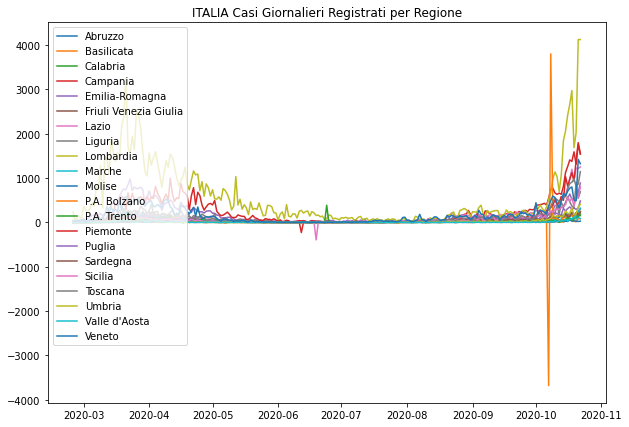

In [84]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(italia.index,italia.values)

    #ax.stackplot(provincia[i]['data'],provincia[i]['daily'],alpha=0.25)

plt.title('ITALIA Casi Giornalieri Registrati per Regione')
ax.legend(labels=italia.columns, loc='upper left')
plt.show()

In [198]:
#OLD_RAGGRUPPA PER REGIONE
italia = dati
italia.loc[italia['denominazione_provincia']== 'In fase di definizione/aggiornamento','denominazione_provincia'] = np.nan
italia = italia.dropna(subset = ['denominazione_provincia'])
italia = italia[['data','denominazione_regione','totale_casi']]
italia = italia.groupby(['denominazione_regione','data'])['totale_casi'].sum().reset_index()
regione = {}
for i in italia['denominazione_regione'].unique():
    regione[i] = italia[italia['denominazione_regione'] == i]
    #trova l'incremento giornaliero e non il progressivo
    regione[i]['daily']=regione[i]['totale_casi'].diff()
    #regione[i]=regione[i].groupby(['denominazione_regione', pd.Grouper(key='data', freq='W')])['daily'].sum().reset_index()
#regione

fig, ax = plt.subplots(figsize=(10,7))

for i in regione:
    ax.plot(regione[i]['data'],regione[i]['daily'],label=i)

    #ax.stackplot(provincia[i]['data'],provincia[i]['daily'],alpha=0.25)

plt.title('ITALIA Casi Giornalieri Registrati per Regione')
ax.legend(loc='upper left')
plt.show()

<ipython-input-198-ad90da414cd7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regione[i]['daily']=regione[i]['totale_casi'].diff()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-184-7b5ed4368e12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincia[i]['daily']=provincia[i]['totale_casi'].diff()


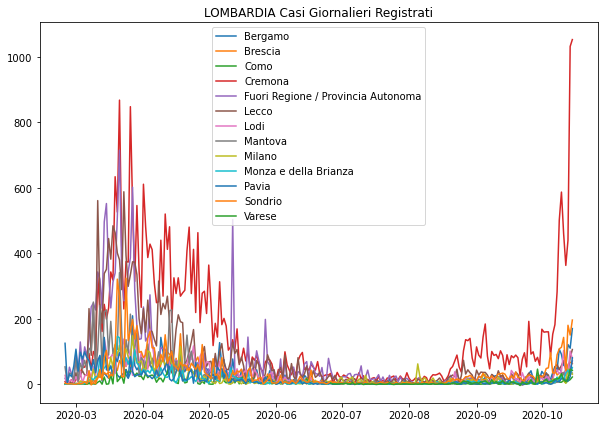

In [184]:
#OLD_RAGGRUPPA PER PROVINCE
provincia = {}
for i in lombardia['denominazione_provincia'].unique():
    provincia[i] = lombardia[lombardia['denominazione_provincia'] == i]
#trova l'incremento giornaliero e non il progressivo
    provincia[i]['daily']=provincia[i]['totale_casi'].diff()
#raggruppa per settimana e resetta indice
    #provincia[i]=provincia[i].groupby(['denominazione_provincia', pd.Grouper(key='data', freq='W')])['daily'].sum().reset_index()
    
#PLOT
fig, ax = plt.subplots(figsize=(10,7))
for i in provincia:
    ax.plot(provincia[i]['data'],provincia[i]['daily'],label=i)
    
plt.title('LOMBARDIA Casi Giornalieri Registrati')
ax.legend(labels=lombardia2.columns)
plt.show()